<a href="https://colab.research.google.com/github/ozturkcemal/ShortestPathVisualization/blob/main/ColabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

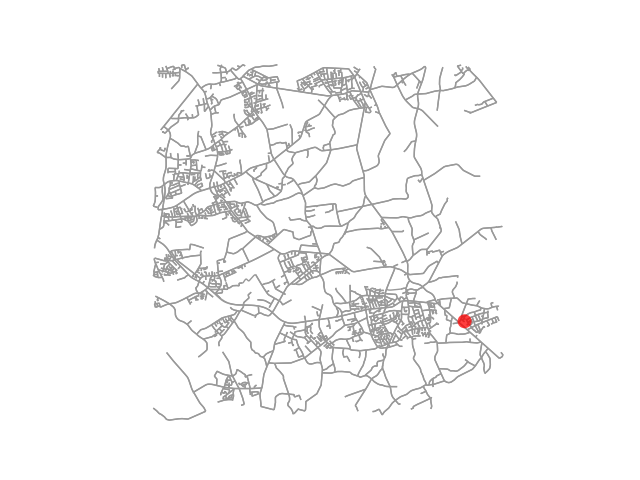

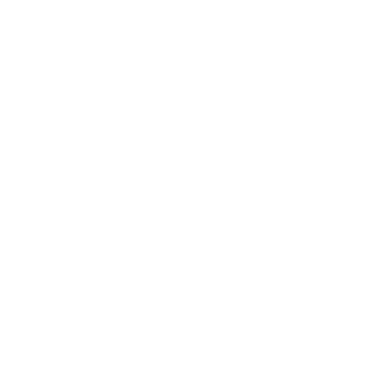

In [2]:
# Install necessary packages
!pip install osmnx networkx celluloid matplotlib

import osmnx as ox
import random
from matplotlib import pyplot as plt
from celluloid import Camera
import networkx as nx
from IPython.display import Image, display

# Latitude and Longitude for a point in Cork (English Market)
latitude = 51.897845
longitude = 8.474891

# Create a graph from a point
G = ox.graph_from_point((latitude, longitude), dist=5000, dist_type='bbox', network_type='drive')

# Ensure the graph is strongly connected (corrected method)
largest_component = max(nx.strongly_connected_components(G), key=len)
G = G.subgraph(largest_component).copy()

# Select two random nodes
origin, destination = random.sample(list(G.nodes), 2)

# Compute the shortest path
shortest_path = nx.shortest_path(G, origin, destination, weight='length')

# Visualization
fig, ax = plt.subplots()
camera = Camera(fig)

# Generate animation frames
for i in range(1, len(shortest_path) + 1):
    ox.plot_graph(G, ax=ax, show=False, close=False, node_size=0, bgcolor='k')
    ox.plot_graph_route(G, shortest_path[:i], route_linewidth=6, node_size=0, bgcolor='k',
                        route_color='r', orig_dest_node_size=100, ax=ax, show=False, close=False)
    camera.snap()

animation = camera.animate()
animation.save('/content/car_journey.gif', writer='pillow')

display(Image('/content/car_journey.gif'))  # Display the animation in Colab